<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/03_Calibrating_supervised_classification_in_Remote_Sensing.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 03 Calibrating Machine Learning algorithms</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo dbfread

Libraries to be used:

In [ ]:
import rasterio
import pandas as pd
import numpy as np
from scikeo.calmla import calmla
import matplotlib.pyplot as plt
from dbfread import DBF
import seaborn as sns
sns.set()

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Endmembers

The signatures to be used can be downloaded [here](https://drive.google.com/drive/folders/1Lwwi23PdLvsWNale1Y39jH-HxoWhwaM7?usp=sharing):

## 3.0 Calibrating supervised classification in Remote Sensing

Endmembers, classes to be classified:

- Forest
- Agriculture
- Urban area
- Water

In [ ]:
path_endm = "/content/drive/MyDrive/Packages/scikit-eo_data/07_calmla/endmembers.dbf"
endm = DBF(path_endm)

In [ ]:
# endmembers
df = pd.DataFrame(iter(endm))
df.head()

,class,b1_LC08_23,b2_LC08_23,b3_LC08_23,b4_LC08_23,b5_LC08_23,b6_LC08_23
0,1.0,646,1137,1446,569,53,33
1,1.0,658,1141,1449,585,68,44
2,1.0,663,1149,1455,573,67,43
3,1.0,657,1147,1453,556,48,29
4,1.0,662,1147,1451,557,52,31


In [ ]:
inst = calmla(endmembers = endm)

A instance of ```splitData()```:

In [ ]:
data = inst.splitData()

### Calibrating with *Set-Approach* (SA)

**Parameters**:
- ```split_data```: A instance obtaind with ```splitData()```
- ```models```: Support Vector Machine (svm), Decision Tree (dt), Random Forest (rf) and Naive Bayes (nb)
- ```train_size```: 70% for training, 30% testing.
- ```n_iter```: Number of iterations

In [ ]:
# Set-Approach
error_sa = inst.SA(split_data = data, models = ('svm', 'dt', 'rf', 'nb'), train_size = 0.7, n_iter = 10)

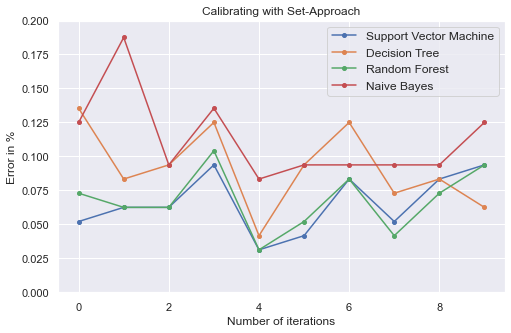

In [ ]:
# Let's visualize the results
x = range(0, 10, 1)

error_svm = error_sa.get('svm')
error_dt = error_sa.get('dt')
error_rf = error_sa.get('rf')
error_nb = error_sa.get('nb')

fig, axes = plt.subplots(figsize=(8,5))
axes.plot(x, error_svm, marker = 'o', ms = 4, label = "Support Vector Machine")
axes.plot(x, error_dt, marker = 'o', ms = 4, label = "Decision Tree")
axes.plot(x, error_rf, marker = 'o', ms = 4, label = "Random Forest")
axes.plot(x, error_nb, marker = 'o', ms = 4, label = "Naive Bayes")
axes.set_ylabel("Error in %")
axes.set_xlabel("Number of iterations")
axes.set_title("Calibrating with Set-Approach")
axes.set_ylim((0, 0.2))
axes.legend(loc = "best", fontsize = 12)
plt.show()

### Calibrating with *Leave One Out Cross-Validation* (LOOCV)

**Parameters**:
- ```split_data```: A instance obtaind with ```splitData()```
- ```models```: Support Vector Machine (svm), Decision Tree (dt), Random Forest (rf) and Naive Bayes (nb)
- ```n_iter```: Number of iterations

In [ ]:
error_loocv = inst.LOOCV(split_data = data, models = ('svm', 'dt', 'rf', 'nb'), n_iter = 10)

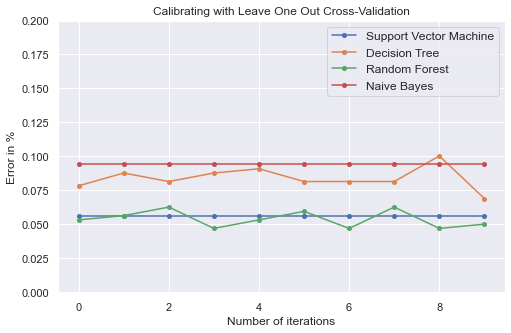

In [ ]:
# Let's visualize the results with LOOCV
x = range(0, 10, 1)

error_svm = error_loocv.get('svm')
error_dt = error_loocv.get('dt')
error_rf = error_loocv.get('rf')
error_nb = error_loocv.get('nb')

fig, axes = plt.subplots(figsize=(8,5))
axes.plot(x, error_svm, marker = 'o', ms = 4, label = "Support Vector Machine")
axes.plot(x, error_dt, marker = 'o', ms = 4, label = "Decision Tree")
axes.plot(x, error_rf, marker = 'o', ms = 4, label = "Random Forest")
axes.plot(x, error_nb, marker = 'o', ms = 4, label = "Naive Bayes")
axes.set_ylabel("Error in %")
axes.set_xlabel("Number of iterations")
axes.set_title("Calibrating with Leave One Out Cross-Validation")
axes.set_ylim((0, 0.2))
axes.legend(loc = "best", fontsize = 12)
plt.show()

### Calibrating with *Cross-Validation* (CV)

**Parameters**:
- ```split_data```: A instance obtaind with ```splitData()```
- ```models```: Support Vector Machine (svm), Decision Tree (dt), Random Forest (rf) and Naive Bayes (nb)
- ```n_iter```: Number of iterations

In [ ]:
error_cv = inst.CV(split_data = data, models = ('svm', 'dt', 'rf', 'nb'), n_iter = 10)

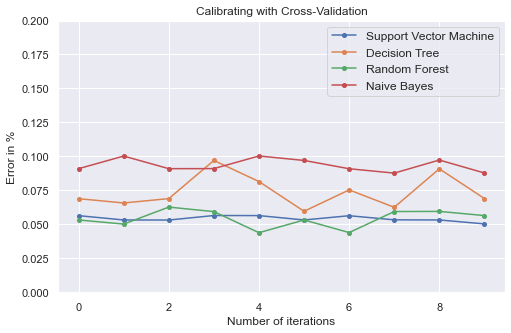

In [ ]:
# Let's visualize the results with CV
x = range(0, 10, 1)

error_svm = error_cv.get('svm')
error_dt = error_cv.get('dt')
error_rf = error_cv.get('rf')
error_nb = error_cv.get('nb')

fig, axes = plt.subplots(figsize=(8,5))
axes.plot(x, error_svm, marker = 'o', ms = 4, label = "Support Vector Machine")
axes.plot(x, error_dt, marker = 'o', ms = 4, label = "Decision Tree")
axes.plot(x, error_rf, marker = 'o', ms = 4, label = "Random Forest")
axes.plot(x, error_nb, marker = 'o', ms = 4, label = "Naive Bayes")
axes.set_ylabel("Error in %")
axes.set_xlabel("Number of iterations")
axes.set_title("Calibrating with Cross-Validation")
axes.set_ylim((0, 0.20))
axes.legend(loc = "best", fontsize = 12)
plt.show()

### Calibrating with *Monte Carlo Cross-Validation Calibration* (MCCV)

**Parameters**:
- ```split_data```: A instance obtaind with ```splitData()```
- ```models```: Support Vector Machine (svm), Decision Tree (dt), Random Forest (rf) and Naive Bayes (nb)
- ```n_iter```: Number of iterations

In [ ]:
error_mccv = inst.MCCV(split_data = data, models = ('svm', 'dt', 'rf', 'nb'), n_iter = 10)

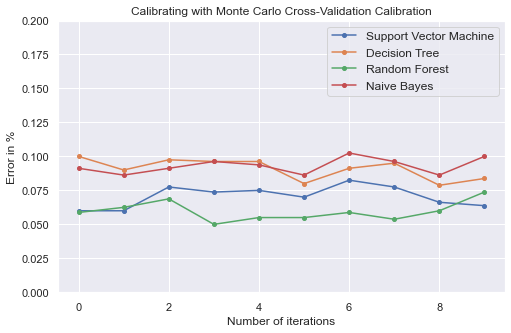

In [ ]:
# Let's visualize the results with MCCV
x = range(0, 10, 1)

error_svm = error_mccv.get('svm')
error_dt = error_mccv.get('dt')
error_rf = error_mccv.get('rf')
error_nb = error_mccv.get('nb')

fig, axes = plt.subplots(figsize=(8,5))
axes.plot(x, error_svm, marker = 'o', ms = 4, label = "Support Vector Machine")
axes.plot(x, error_dt, marker = 'o', ms = 4, label = "Decision Tree")
axes.plot(x, error_rf, marker = 'o', ms = 4, label = "Random Forest")
axes.plot(x, error_nb, marker = 'o', ms = 4, label = "Naive Bayes")
axes.set_ylabel("Error in %")
axes.set_xlabel("Number of iterations")
axes.set_title("Calibrating with Monte Carlo Cross-Validation Calibration")
axes.set_ylim((0, 0.2))
axes.legend(loc = "best", fontsize = 12)
plt.show()